In [1]:
import kdshmap as kd
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

# Hamiltonian definition

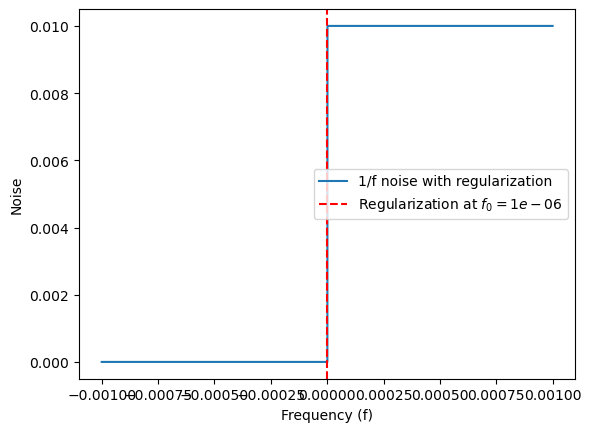

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the parameters
gamma = 1e-2  # Example value for gamma
f0 = 1e-6        # Regularization frequency


# Define the piecewise function
def noise_function(f, f0, gamma):
    return np.piecewise(f, 
                        [np.abs(f) < f0, np.abs(f) >= f0], 
                         [lambda f: 1/f0 * gamma**2,
                          lambda f: 1/np.abs(f) * gamma**2])

    #return np.exp(f/f0) * gamma

def noise_function2(f, f0, gamma):
    return np.piecewise(f, 
                        [f <= 0, f > f0], 
                        [lambda f: 0,
                         lambda f: gamma])

# Example frequency list
f_list = np.linspace(-0.001,0.001, 200001)
wt = 2 * np.pi * f_list  # Example angular frequency

# Calculate the noise values
noise_values = noise_function(f_list, f0, gamma)
noise_values1 = noise_function2(f_list, f0, gamma)

# Plot the function
plt.plot(f_list, noise_values1, label='1/f noise with regularization')
plt.axvline(f0, color='r', linestyle='--', label=f'Regularization at $f_0={f0}$')
plt.xlabel('Frequency (f)')
plt.ylabel('Noise')
plt.legend()
plt.show()

In [3]:
# Transmon parameters
tmon_dim = 2  # transmon truncation dimension
wq = 4 * 2*np.pi  # transmon frequency
alpha = -0.3 * 2*np.pi  # transmon anharmonicity
    
# 1/f noise
gamma = 1e-2  # Example value for gamma
f0 = 1     # Regularization frequency

f_list = np.linspace(-0.01,0.01, 200001)
Sf_list = noise_function(f_list, f0, gamma)

In [4]:
# Transmon Hamiltonian
H = (q.num(tmon_dim)*wq + alpha * (q.num(tmon_dim)*(q.num(tmon_dim)-1)/2))
n = q.destroy(tmon_dim)+q.create(tmon_dim)
num = q.create(tmon_dim)*q.destroy(tmon_dim)
t_list_full = np.linspace(0, 200, 50001)
env = np.exp(-(t_list_full-t_list_full[-1]/2)**2/(t_list_full[-1]/2)**2)
env = env - np.min(env)
drive_list = 2*np.pi*0.3*np.cos((wq+0.00)*t_list_full) * 0.1
H = [H, [n, q.interpolate.Cubic_Spline(0, t_list_full[-1], drive_list)]]

/home/nrohan/main/kdshmap/kdshmap/utils/noise_spec.py:62: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Sfk_list[f_] = sp.integrate.quad(spec_func, fk_list[f_]-f_fund/2, fk_list[f_]+f_fund/2)[0] / f_fund
/home/nrohan/main/kdshmap/kdshmap/utils/noise_spec.py:62: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Sfk_list[f_] = sp.integrate.quad(spec_func, fk_list[f_]-f_fund/2, fk_list[f_]+f_fund/2)[0] / f_fund
/home/nrohan/main/kdshmap/kdshmap/utils/noise_spec.py:62: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Sfk_list[f_] = sp.integrate.quad(spec_func, fk_list[f_]-f_fund/2, fk_list[f_]+f_fund/2)[0] / f_fund
/home/nrohan/main/kdshmap/kdshmap/utils/noise_spec.py:71: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  Sfk_list[f_] = sp.integrate.quad(spec_func, fk_list[f_]-5*f_fund/2, fk_list[f_]+5*f_fund/2)[0]
/home/nrohan/main/kdshmap/kdshmap/utils/noise_spec.py

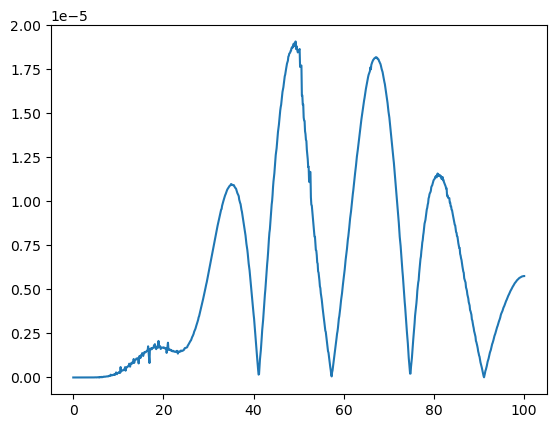

In [5]:
# kdshsolver
t_list = np.linspace(0, 100, 1001)
minimal_step = 1/100

solver = kd.KeldyshSolver(H, t_list, minimal_step, [num],
                          [f_list], [Sf_list], trunc_freq=[(-5, 5)], density0=q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag(),
                          e_ops=[q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag()], spd_renorm_method='trapz', goal='expect')

# kdshsolver
t_list = np.linspace(0, 100, 1001)
minimal_step = 1/100

solver1 = kd.KeldyshSolver(H, t_list, minimal_step, [num],
                          [f_list], [Sf_list], trunc_freq=[(-5, 5)], density0=q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag(),
                          e_ops=[q.basis(tmon_dim, 1)*q.basis(tmon_dim, 1).dag()], spd_renorm_method='sinc2', goal='expect')

diff = np.abs(solver.expect[0] - solver1.expect[0])

plt.plot(t_list, diff)

/opt/anaconda3/envs/scqubits_Rohan/lib/python3.11/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


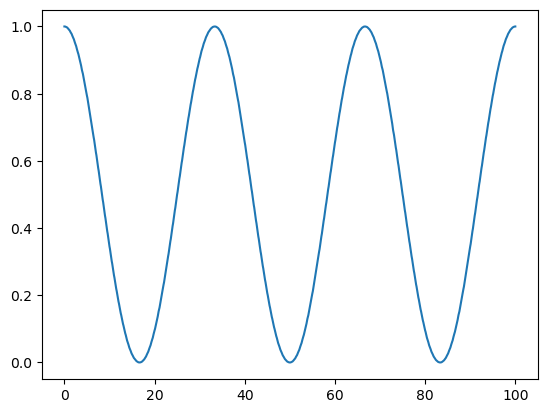

In [6]:
plt.plot(t_list, solver.expect[0])

In [7]:
# Transmon parameters
tmon_dim = 2  # transmon truncation dimension
wq = 4 * 2*np.pi  # transmon frequency
alpha = -0.3 * 2*np.pi  # transmon anharmonicity
    
# 1/f noise
gamma = 1e-3  # Example value for gamma
f0 = 1e-3     # Regularization frequency

f_list  = np.linspace(-10, 10, 20001)
Sf_list1 = noise_function2(f_list, f0, gamma)

# Functions

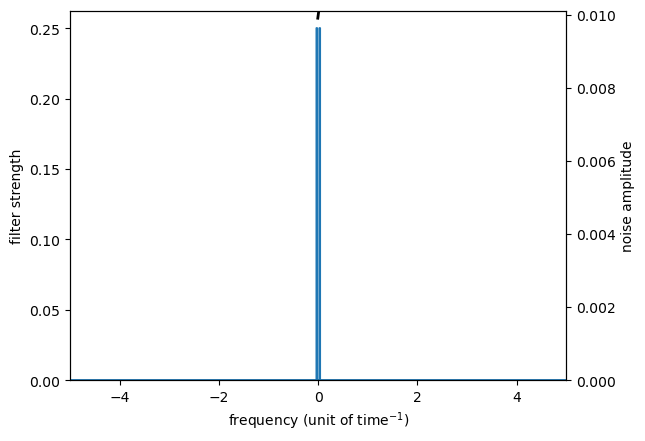

In [217]:
ax = solver.plot_filter_Sf()